In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
import seaborn as sns
from keras.models import load_model
cars_data=pd.read_csv('/content/CarPrice_Assignment.csv')




  

In [13]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [16]:
#cars_data=shuffle(cars_data)
cars_data=cars_data.drop('CarName',axis=1)
cars_data=cars_data.drop('car_ID',axis=1)

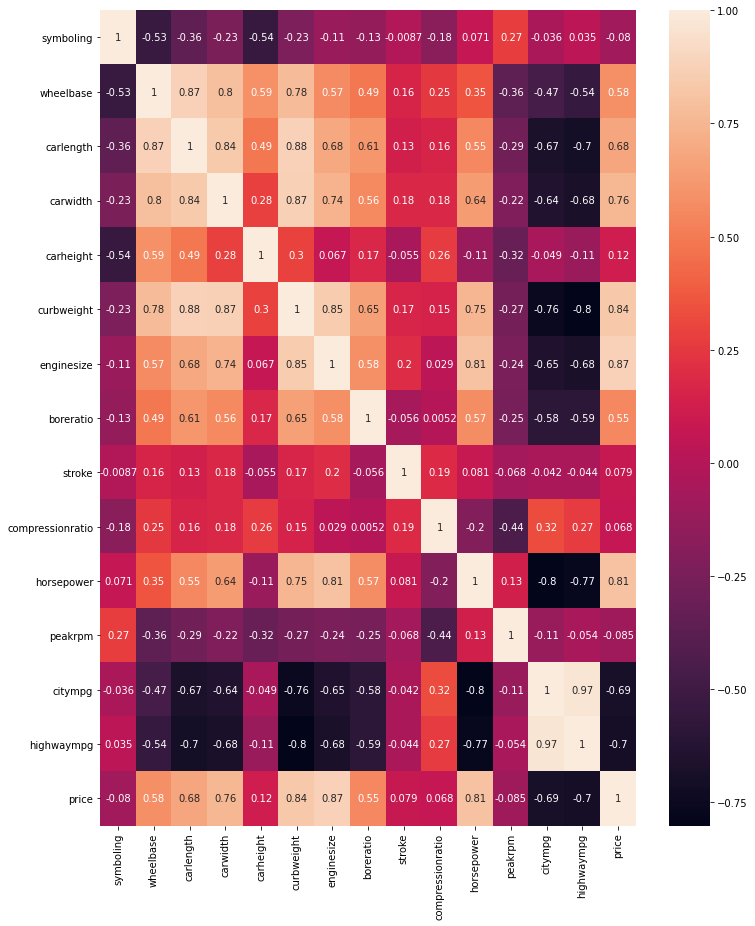

In [17]:
plt.figure(figsize=(12,15))
sns.heatmap(cars_data.corr(),annot=True)

In [18]:
cars_data.drop(['enginetype','cylindernumber','fueltype','aspiration','doornumber','carbody','symboling','stroke','compressionratio','peakrpm','wheelbase','carheight','boreratio'],axis=1,inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
cols=['drivewheel','enginelocation','fuelsystem']
labelencoder = LabelEncoder()
for col in cols:
  cars_data[col]=labelencoder.fit_transform(cars_data[col])
cars_data.head()  



,drivewheel,enginelocation,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,2,0,168.8,64.1,2548,130,5,111,21,27,13495.0
1,2,0,168.8,64.1,2548,130,5,111,21,27,16500.0
2,2,0,171.2,65.5,2823,152,5,154,19,26,16500.0
3,1,0,176.6,66.2,2337,109,5,102,24,30,13950.0
4,0,0,176.6,66.4,2824,136,5,115,18,22,17450.0


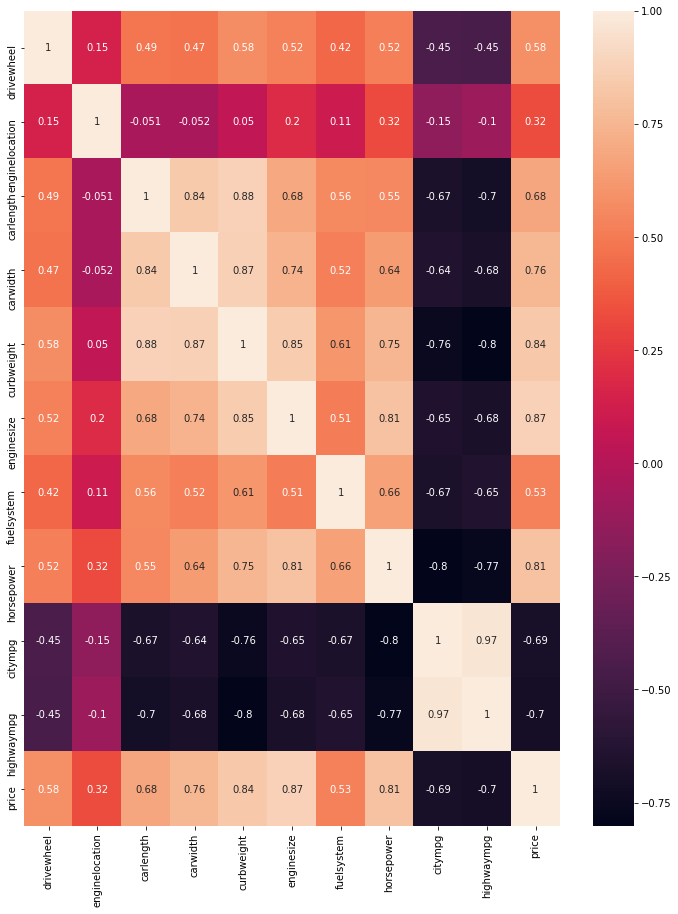

In [20]:
plt.figure(figsize=(12,15))
sns.heatmap(cars_data.corr(),annot=True)

In [21]:
cars_data.shape

(205, 11)

In [22]:
train_data=cars_data.iloc[:103]
train_targets=cars_data.price.iloc[:103]
train_targets=np.asarray(train_targets)
train_data.drop('price',axis=1,inplace=True)


print(train_data.shape)

test_data=cars_data.iloc[103:166]
test_targets=cars_data.price.iloc[103:166]
test_targets=np.asarray(test_targets)
test_data.drop('price',axis=1,inplace=True)


print(test_data.shape)

(103, 10)
(63, 10)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
test_data

,drivewheel,enginelocation,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
103,1,0,184.6,66.5,3060,181,5,152,19,25
104,2,0,170.7,67.9,3071,181,5,160,19,25
105,2,0,170.7,67.9,3139,181,5,200,17,23
106,2,0,178.5,67.9,3139,181,5,160,19,25
107,2,0,186.7,68.4,3020,120,5,97,19,24
...,...,...,...,...,...,...,...,...,...,...
161,1,0,166.3,64.4,2122,98,1,70,28,34
162,1,0,166.3,64.4,2140,98,1,70,28,34
163,2,0,168.7,64.0,2169,98,1,70,29,34
164,2,0,168.7,64.0,2204,98,1,70,29,34


In [24]:

val_data=cars_data.iloc[166:]
val_data.drop('price',axis=1,inplace=True)

val_targets=cars_data.price.iloc[166:]
val_targets=np.asarray(val_targets)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
val_data.head()

,drivewheel,enginelocation,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
166,2,0,168.7,64.0,2300,98,5,112,26,29
167,2,0,176.2,65.6,2540,146,5,116,24,30
168,2,0,176.2,65.6,2536,146,5,116,24,30
169,2,0,176.2,65.6,2551,146,5,116,24,30
170,2,0,176.2,65.6,2679,146,5,116,24,30


In [26]:
train_data.head()

,drivewheel,enginelocation,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
0,2,0,168.8,64.1,2548,130,5,111,21,27
1,2,0,168.8,64.1,2548,130,5,111,21,27
2,2,0,171.2,65.5,2823,152,5,154,19,26
3,1,0,176.6,66.2,2337,109,5,102,24,30
4,0,0,176.6,66.4,2824,136,5,115,18,22


In [27]:
train_data.isna().sum()

drivewheel        0
enginelocation    0
carlength         0
carwidth          0
curbweight        0
enginesize        0
fuelsystem        0
horsepower        0
citympg           0
highwaympg        0
dtype: int64

In [28]:
test_data.isna().sum()

drivewheel        0
enginelocation    0
carlength         0
carwidth          0
curbweight        0
enginesize        0
fuelsystem        0
horsepower        0
citympg           0
highwaympg        0
dtype: int64

In [29]:
val_data.isna().sum()

drivewheel        0
enginelocation    0
carlength         0
carwidth          0
curbweight        0
enginesize        0
fuelsystem        0
horsepower        0
citympg           0
highwaympg        0
dtype: int64

In [30]:
train_data.iloc[1].shape

(10,)

In [167]:
model = models.Sequential()
model.add(layers.Dense(20, kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=(train_data.iloc[1].shape)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(5,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.Dense(5,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
his=model.fit(train_data,train_targets,epochs=150,batch_size=1,validation_data=(val_data,val_targets))

Epoch 1/150
103/103 [==============================] - 1s 3ms/step - loss: 268555232.0000 - mae: 13442.0713 - val_loss: 169434320.0000 - val_mae: 12338.0674
Epoch 2/150
103/103 [==============================] - 0s 2ms/step - loss: 237013008.0000 - mae: 12283.7764 - val_loss: 124714808.0000 - val_mae: 10446.2598
Epoch 3/150
103/103 [==============================] - 0s 2ms/step - loss: 175648656.0000 - mae: 9603.0078 - val_loss: 63603960.0000 - val_mae: 7111.9463
Epoch 4/150
103/103 [==============================] - 0s 2ms/step - loss: 113943376.0000 - mae: 7059.4941 - val_loss: 20656224.0000 - val_mae: 3339.3420
Epoch 5/150
103/103 [==============================] - 0s 2ms/step - loss: 92014640.0000 - mae: 6703.5923 - val_loss: 9945370.0000 - val_mae: 2370.6792
Epoch 6/150
103/103 [==============================] - 0s 2ms/step - loss: 101570960.0000 - mae: 6854.7231 - val_loss: 8692871.0000 - val_mae: 2369.0674
Epoch 7/150
103/103 [==============================] - 0s 2ms/step - loss

In [168]:
model.evaluate(test_data,test_targets)

2/2 [==============================] - 0s 7ms/step - loss: 18066286.0000 - mae: 2375.7920


[18066286.0, 2375.7919921875]

In [169]:

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_4 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 521
Trainable params: 521
Non-trainable params: 0
________________________________________________________

In [170]:
his.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

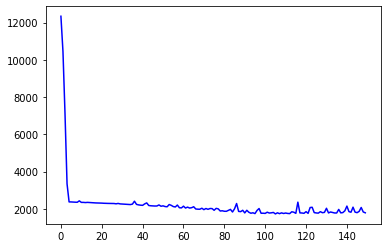

In [171]:
import matplotlib.pyplot as plt

valmae=his.history['val_mae']
epochs=range(150)
plt.plot(epochs,valmae,'b',label='val mae')


In [172]:
pred=model.predict(test_data)
pred[3]

array([19401.285], dtype=float32)

In [173]:
test_targets[3]

18399.0

In [174]:
model.save('car_price_model1')

INFO:tensorflow:Assets written to: car_price_model1/assets


In [4]:
model=load_model('/content/content/car_price_model1')

In [31]:
a=model.predict(test_data)
a[3]

array([19401.285], dtype=float32)